In [70]:
import numpy as np 
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [71]:
def cepstrum_implement(x):
    
    p = np.poly1d(x)
    roots = p.r
    N = 300
    n_positive = np.arange(1,N+1).astype(np.float64)
    n_negative = np.arange(-N,0).astype(np.float64)
    
    cep_positive = np.arange(N+1,N+1+N)
    cep_negative = np.arange(0,N)
    cep = np.zeros(2*N+1).astype(np.complex128)
    
    minimum = 1e-6
    A = x[x>minimum][0]
    for value in roots:
        if abs(value) > minimum:
            if abs(value) < 1+minimum:
                cep[cep_positive] = cep[cep_positive]-np.power(value, n_positive)/n_positive
            else:
                cep[cep_negative] = cep[cep_negative]+np.power(1/value, -n_negative)/n_negative
                A = A*abs(value)
    cep[N] = np.log(A)
    return cep

def inverse_cepstrum(cep1):
    N = 300
    Lm = 300
    Lm1 = Lm*2+1
    flt = 1
    minimum = 1e-6
    
    gm = np.array([math.gamma(i+1) for i in range(50)])
    gm = np.concatenate((gm, np.ones(Lm-49)*gm[-1]))
    
    for a2 in range(N):
        a21 = N-a2
        if abs(cep1[a2])>minimum:
            ff = np.zeros(Lm+1).astype(np.complex128)
            md = Lm//a21
            index = np.linspace(0,0+a21*md,num=md+1,endpoint=True).astype(np.int64)
            ff[index] = np.power(cep1[a2],np.arange(md+1))/gm[:md+1]
            flt = np.convolve(flt,ff)
            flt = flt[:Lm+1]

#     exp_x = flt[np.arange(300,-1,-1)]*np.exp(cep1[N])
#     xa = np.concatenate((exp_x, np.zeros(Lm)))
    xa=[np.zeros(Lm),1,np.zeros(Lm)]
    for a3 in range(1,N+1):
        a31 = N+a3
        if abs(cep1[a31])>minimum:
            ff = np.zeros(Lm+1).astype(np.complex128)
            md = Lm//a3
            index = np.linspace(0,0+a3*md,num=md+1,endpoint=True).astype(np.int64)
            ff[index]=np.power(cep1[a31],np.arange(md+1))/gm[:md+1]
            xa = np.convolve(xa,ff)
            xa = xa[:Lm1]
    return xa

In [89]:
fs = 102400
f = 5000
duration_count = int(1/f*1*fs)
time_s = (np.arange(duration_count)+1)/fs
s = np.sin(2*np.pi*f*time_s)
# window = np.hanning(len(s))
window = np.ones(len(s))
window_s = s*window
duration_total = int(0.01*fs)
time = np.arange(duration_total)/fs
s_origin = np.concatenate((window_s, np.zeros(duration_total-len(s))))

In [90]:
time_delay_1 = 0.002
alpha_1 = 0.5
s_1 = np.concatenate((np.zeros(int(time_delay_1*fs)), alpha_1*window_s))
s_1 = np.concatenate((s_1, np.zeros(duration_total-len(s_1))))

np.random.seed(0)
signal_distorted = s_origin + s_1 + 0.005*np.random.randn(len(s_origin))

In [91]:
len(s)

20

In [92]:
int(time_delay_1*fs)

204

<IPython.core.display.Javascript object>


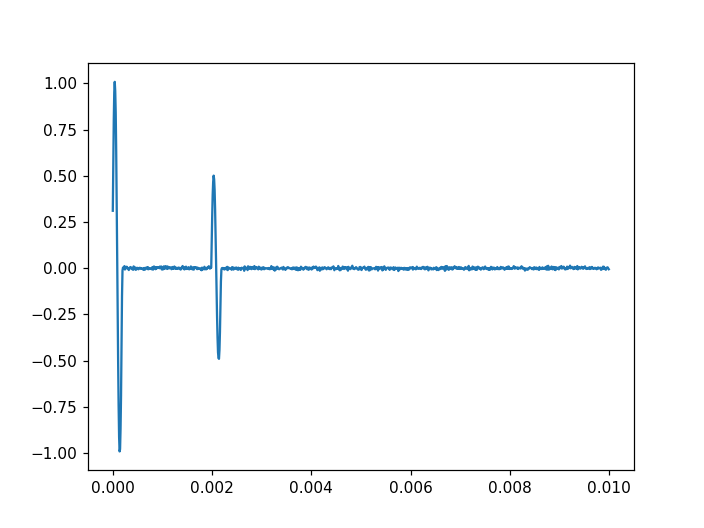

In [93]:
fig, ax = plt.subplots()
ax.plot(time, signal_distorted)

<IPython.core.display.Javascript object>


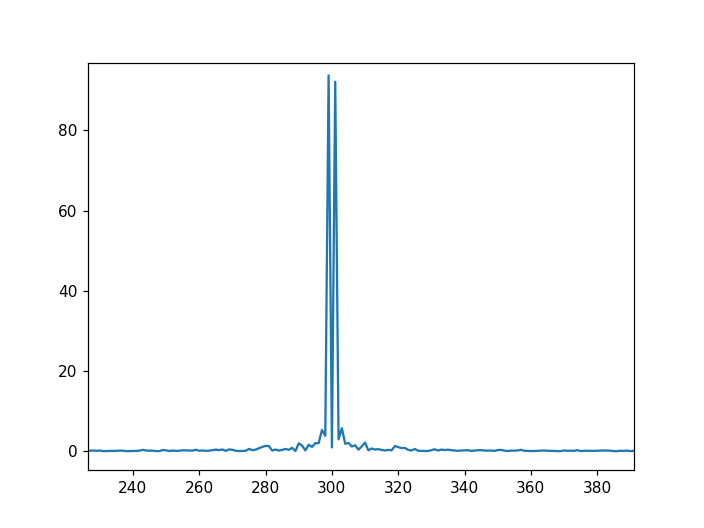

In [94]:
cep = cepstrum_implement(signal_distorted)
fig, ax = plt.subplots()
ax.plot(abs(cep))

In [54]:
x = inverse_cepstrum(cep)
fig, ax = plt.subplots()
ax.plot(abs(x))

<ipython-input-49-88b16701aca0>:41: RuntimeWarning: overflow encountered in power
  ff[index] = np.power(cep1[a2],np.arange(md+1))/gm[:md+1]
<ipython-input-49-88b16701aca0>:41: RuntimeWarning: invalid value encountered in true_divide
  ff[index] = np.power(cep1[a2],np.arange(md+1))/gm[:md+1]
<ipython-input-49-88b16701aca0>:54: RuntimeWarning: overflow encountered in power
  ff[index]=np.power(cep1[a31],np.arange(md+1))/gm[:md+1]
<ipython-input-49-88b16701aca0>:54: RuntimeWarning: invalid value encountered in true_divide
  ff[index]=np.power(cep1[a31],np.arange(md+1))/gm[:md+1]
C:\Users\dindong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\numeric.py:817: RuntimeWarning: invalid value encountered in multiply
  return multiarray.correlate(a, v[::-1], mode)
C:\Users\dindong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\cor

<IPython.core.display.Javascript object>

ValueError: setting an array element with a sequence.

In [48]:
len(x)

601